In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
data = pd.read_csv('Bank_of_America_data.csv', sep=',')
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
data=data._get_numeric_data()
data.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
data.shape

(5960, 11)

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(3515, 11)

- Objectif métier : Prédire le profit d'une entreprise à partir de sa position géographique et de quelques informations utiles

In [10]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,0.087909,19187.880512,75623.036415,106875.773257,9.165292,0.146515,0.270555,181.082668,1.023044,21.954481,34.120568
std,0.283203,11315.617764,44761.833125,54200.456754,7.667258,0.576416,0.795853,82.396940,1.533828,9.360130,8.093908
min,0.000000,1700.000000,5076.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,11900.000000,48850.500000,70989.000000,3.000000,0.000000,0.000000,118.676290,0.000000,16.000000,29.382991
50%,0.000000,16900.000000,66590.000000,94071.000000,7.000000,0.000000,0.000000,176.530327,0.000000,21.000000,34.980525
75%,0.000000,23600.000000,92598.000000,122175.000000,14.000000,0.000000,0.000000,230.272746,2.000000,27.000000,39.005824
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


In [11]:
abs(( data.mean() - data.median() ) / ( data.median() )) * 100

BAD              inf
LOAN       13.537755
MORTDUE    13.565155
VALUE      13.611818
YOJ        30.932737
DEROG            inf
DELINQ           inf
CLAGE       2.578787
NINQ             inf
CLNO        4.545147
DEBTINC     2.458390
dtype: float64

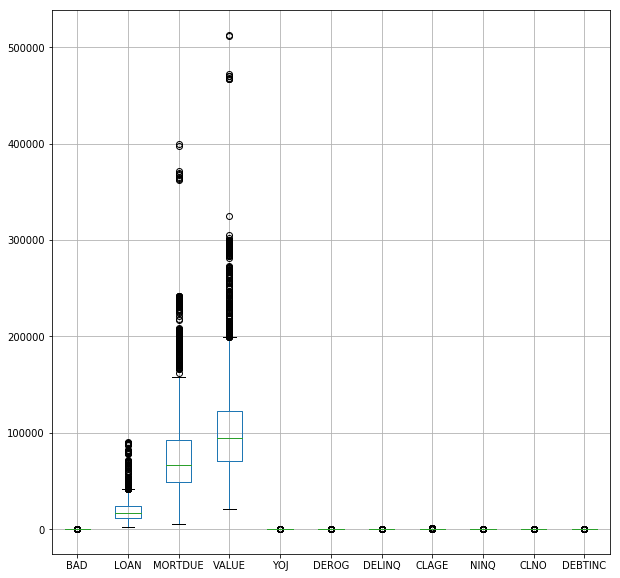

In [12]:
data.boxplot(figsize=(10,10));

In [13]:
data =data[(data["MORTDUE"]< 160000) & (data["VALUE"]< 200000)] #MASKING

- Tuckey's method (extreme theory)
$$    ( Q3 - Q1 ) * 1.5    $$

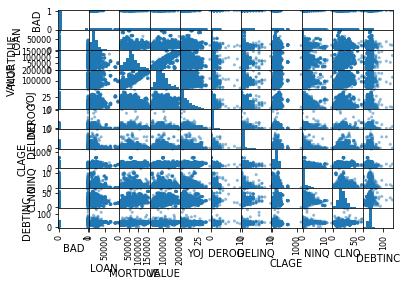

In [14]:
pd.plotting.scatter_matrix(data);

In [15]:
data.corr() # test d'hypothése statistique test de Pearson

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.050308,-0.031129,-0.065529,-0.073637,0.241345,0.277956,-0.109192,0.115362,0.022344,0.223500
LOAN,-0.050308,1.000000,0.028057,0.247828,0.128024,-0.009155,-0.054462,0.019356,0.017414,-0.002721,0.140011
MORTDUE,-0.031129,0.028057,1.000000,0.835171,-0.114176,-0.026098,-0.039998,0.071776,0.013748,0.288954,0.208157
VALUE,-0.065529,0.247828,0.835171,1.000000,-0.019712,-0.065255,-0.040499,0.194025,-0.025899,0.240769,0.164817
YOJ,-0.073637,0.128024,-0.114176,-0.019712,1.000000,-0.060620,0.029055,0.243158,-0.051548,0.012486,-0.060718
DEROG,0.241345,-0.009155,-0.026098,-0.065255,-0.060620,1.000000,0.137749,-0.052049,0.145308,0.063849,0.028387
DELINQ,0.277956,-0.054462,-0.039998,-0.040499,0.029055,0.137749,1.000000,0.012160,-0.017848,0.123001,0.050751
CLAGE,-0.109192,0.019356,0.071776,0.194025,0.243158,-0.052049,0.012160,1.000000,-0.100763,0.188659,-0.058580
NINQ,0.115362,0.017414,0.013748,-0.025899,-0.051548,0.145308,-0.017848,-0.100763,1.000000,0.070035,0.148509
CLNO,0.022344,-0.002721,0.288954,0.240769,0.012486,0.063849,0.123001,0.188659,0.070035,1.000000,0.135016


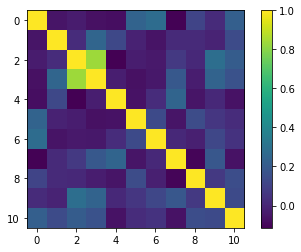

In [16]:
plt.imshow(data.corr())
plt.colorbar();

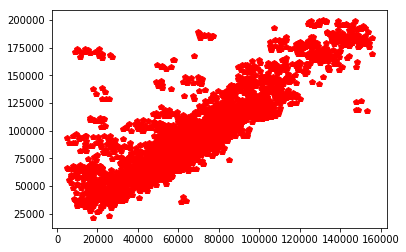

In [17]:
plt.plot(data["MORTDUE"] , data["VALUE"], "rp");

In [18]:
# Rescaling 
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
ss2 = StandardScaler()

In [19]:
X = data.iloc[ : , 2 ].values
Y = data.iloc[ : , 3 ].values

In [20]:
X_ss = ss1.fit_transform(X.reshape(-1,1))
Y_ss = ss2.fit_transform(Y.reshape(-1,1))

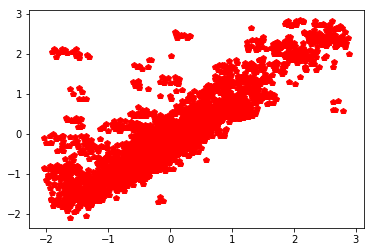

In [21]:
plt.plot(X_ss,Y_ss,"rp");

In [22]:
# Random Sampling
# Echantillonnage Aléatoire
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X_ss,Y_ss ,test_size=0.2, random_state=10)

In [23]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [24]:
model1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
model1.intercept_ # hadhia l b

array([-0.0019702])

In [27]:
model1.coef_

array([[0.83454528]])

In [28]:
model1.score(X_test,Y_test)

0.6906239946145061

In [29]:
from scipy.stats import linregress
linregress(X_train.reshape(2613 ),Y_train.reshape(2613 ))

LinregressResult(slope=0.8345452790650028, intercept=-0.0019702003742648223, rvalue=0.8359786297199926, pvalue=0.0, stderr=0.010721000641364987)

In [30]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [31]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [32]:
trace0=go.Scatter(x=list(X_train.reshape(2613)),y=list(Y_train.reshape(2613)),mode="markers")
trace1=go.Scatter(x=list(X_test.reshape(654  )),y=list(Y_test.reshape(654  )),mode="markers")
y_pred=model1.coef_*X_train.reshape(2613)+model1.intercept_
trace2=go.Scatter(x=list(X_train.reshape(2613)),y=list(y_pred.reshape(2613)),mode="lines")

data=[trace0,trace1,trace2]


In [33]:
layout=go.Layout(title="Regression lineaire")

In [34]:
fig=go.Figure(data=data,layout=layout)

In [35]:
pyo.plot(fig)

'temp-plot.html'

In [37]:
app=dash.Dash()

In [38]:
app.layout=html.Div(children=[html.H1("Mon premier dashboard"),html.H2("modele lineaire"),dcc.Graph(figure=fig)])

In [39]:
app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Jan/2020 22:50:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2020 22:50:07] "GET /_dash-component-suites/dash_renderer/react@16.8.6.min.js?v=1.1.2&m=1571388690 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2020 22:50:07] "GET /_dash-component-suites/dash_renderer/prop-types@15.7.2.min.js?v=1.1.2&m=1571388690 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2020 22:50:07] "GET /_dash-component-suites/dash_renderer/react-dom@16.8.6.min.js?v=1.1.2&m=1571388690 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2020 22:50:07] "GET /_dash-component-suites/dash_html_components/dash_html_components.min.js?v=1.0.1&m=1571388699 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2020 22:50:07] "GET /_dash-component-suites/dash_core_components/highlight.pack.js?v=1.3.1&m=1571388694 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2020 22:50:08] "GET /_dash-component-suites/dash_renderer/dash_renderer.min.js?v=1.1.2&m=1571388690 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2020 2